In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
MD = pd.read_csv('MD.csv')
MD_totals = pd.read_csv('MD_totals.csv')
MD_condensed = pd.read_csv('MD_condensed.csv')
delrows = MD_condensed[MD_condensed['Year'] > 2020].index
MD_condensed = MD_condensed.drop(delrows, axis=0)
MD_condensed.drop(['Unnamed: 0'], axis=1, inplace=True)
MD_totals.set_index('County')

,Average Population,Murder,Forcible Sex Offenses,Robbery,Aggravated Assault,Burglary,Larceny,Motor Vehicle Theft,Total Index Crimes,Total Violent Crimes,Total Property Crimes
County,,,,,,,,,,,
Allegany County,76235,53,636,1004,7088,14665,50109,2175,8781,66949,75730
Anne Arundel County,525965,513,3620,20443,54576,92606,376912,41407,79152,510925,590077
Baltimore City,679782,8899,11535,194512,209994,313964,822257,215880,424940,1352101,1777041
Baltimore County,800368,971,7220,53795,116294,164945,628489,99601,178280,893035,1071315
Calvert County,81447,48,379,584,5498,9746,30597,2124,6509,42467,48976
Caroline County,32113,31,287,454,2955,6857,16071,1302,3727,24230,27957
Carroll County,161309,60,966,1379,7140,17217,61023,3904,9545,82144,91689
Cecil County,94621,94,636,2181,10777,21403,55956,5680,13688,83039,96727
Charles County,137877,182,1026,4482,15039,20316,85845,10789,20729,116950,137679


In [3]:
NY = pd.read_csv('NY.csv')
NY.drop(['Unnamed: 0'], axis=1, inplace=True)
NY_condensed = NY[['County', 'Year', 'Population', 'Index Count', 'Index Rate', 'Violent Count', 'Violent Rate', 'Property Count', 'Property Rate']]
delrows = NY_condensed[NY_condensed['Year'] > 2020].index
NY_condensed = NY_condensed.drop(delrows, axis=0)

In [4]:
FL = pd.read_csv('Florida_Data_Clean.csv')
FL_totals = pd.read_csv('FL_totals.csv')
FL_condensed = pd.read_csv('FL_condensed.csv')
FL_condensed.drop(['Unnamed: 0'], axis=1, inplace=True)
FL_totals.set_index('County')

,Average Population,Murder,Forcible Sex Offenses,Robbery,Aggravated Assault,Burglary,Larceny,Motor Vehicle Theft,Total Index Crimes,Total Violent Crimes,Total Property Crimes
County,,,,,,,,,,,
Alachua County,239397,300,6499,12067,43131,85041,248831,25100,420969,49930,371039
Baker County,24771,33,207,292,2483,3312,8686,916,15929,2723,13206
Bay County,163000,268,3102,4413,21039,47698,166553,12245,255318,24409,230909
Bradford County,27597,35,381,415,3556,6618,14365,1464,26834,3972,22862
Brevard County,528842,649,8979,15989,70789,134764,398802,36055,666027,80417,585610
...,...,...,...,...,...,...,...,...,...,...,...
Union County,14736,20,90,89,1000,1463,1724,507,4893,1110,3783
Volusia County,483236,654,6933,18176,58626,143494,372656,45802,646341,66213,580128
Wakulla County,26287,26,406,180,2150,4733,10345,1104,18944,2582,16362


In [5]:
allstates = [NY_condensed,FL_condensed, MD_condensed]
tristate = pd.concat(allstates)
tristate_totals = tristate.groupby('County')[['County', 'Year', 'Population', 'Index Count', 'Index Rate', 'Violent Count', 'Violent Rate', 'Property Count', 'Property Rate']].sum()
tristate["County-Year"] = tristate['County'].astype(str) +"-"+ tristate["Year"].astype(str)
tristate.drop(['County', 'Year'], axis=1, inplace=True)
tristate.dropna(inplace = True)
tristate.set_index('County-Year', inplace=True)
tristate_indexes = tristate.index

In [6]:
tristate_totals.drop(['Year'], axis=1, inplace=True)
tristate_totals['Population'] = tristate_totals['Population']/30
tristate_totals['Index Rate'] = tristate_totals['Index Rate']/30
tristate_totals['Index Count'] = tristate_totals['Index Count']/30
tristate_totals['Violent Rate'] = tristate_totals['Violent Rate']/30
tristate_totals['Violent Count'] = tristate_totals['Violent Count']/30
tristate_totals['Property Rate'] = tristate_totals['Property Rate']/30
tristate_totals['Property Count'] = tristate_totals['Property Count']/30
total_indexes = tristate_totals.index
tristate_totals

,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate
County,,,,,,,
Alachua County,239396.766667,14032.300000,19.753633,1664.333333,156.275610,12367.966667,22.720586
Albany,309240.266667,12415.400000,4165.266667,1394.866667,467.473333,11020.533333,3697.810000
Allegany,51250.000000,901.766667,1803.353333,104.200000,208.770000,797.566667,1594.576667
Allegany County,76234.533333,2524.333333,31.653862,292.700000,276.805347,2231.633333,35.919290
Anne Arundel County,525964.766667,19669.233333,29.253967,2638.400000,216.546515,17030.833333,34.101552
...,...,...,...,...,...,...,...
Westchester,964251.633333,21240.100000,2312.823333,2786.200000,301.496667,18453.900000,2011.343333
Wicomico County,93024.433333,4497.733333,22.576681,711.666667,146.634133,3786.066667,26.866950
Worcester County,47990.633333,2587.400000,20.241812,285.266667,199.156223,2302.133333,22.735463


In [7]:
#EVERY COUNTY, EVERY YEAR
#Preprocessing
scaler = preprocessing.StandardScaler()
scaled_tristate = scaler.fit_transform(tristate)
scaler.fit(tristate)
tristate = pd.DataFrame(scaled_tristate)
for c in tristate.columns:
    tri_mean = tristate[c].mean()
    tristate[c].fillna(value=tri_mean, inplace=True)
    pd.to_numeric(tristate[c])
#Decomposition And Clustering
pca = PCA(2)
tristate_decomp = pca.fit_transform(tristate)
decomp_df = pd.DataFrame(tristate_decomp, index=tristate_indexes)
kmeans = KMeans(n_clusters=4, random_state=33587)
kmeans.fit_predict(tristate_decomp)
tristate_labels = kmeans.labels_
tristate_labels

array([1, 1, 1, ..., 0, 0, 0])

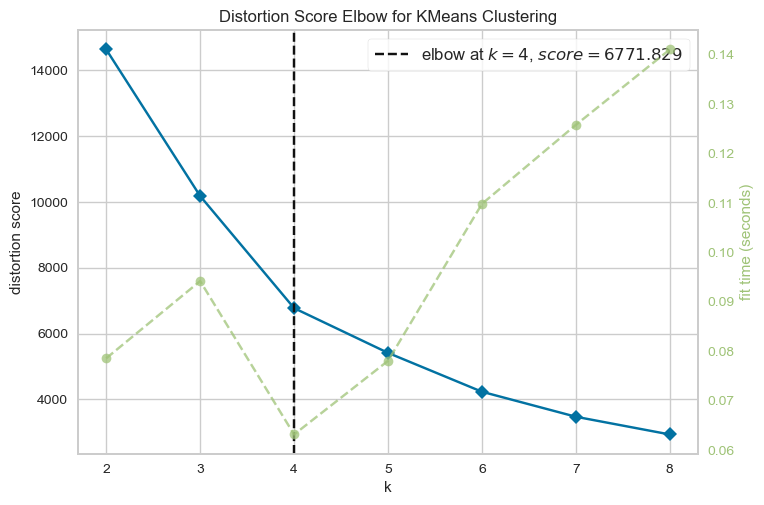

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
#Elbow Method for determining amount of clusters (NOT TOTAL)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9), distance_metric='euclidean')
visualizer.fit(tristate_decomp)
visualizer.show()

In [9]:
#EVERY COUNTY, TOTALS
#Preprocessing
scaler = preprocessing.StandardScaler()
scaled_tristate = scaler.fit_transform(tristate_totals)
scaler.fit(tristate_totals)
tristate_totals = pd.DataFrame(scaled_tristate)
for c in tristate_totals.columns:
    tri_mean = tristate_totals[c].mean()
    tristate_totals[c].fillna(value=tri_mean, inplace=True)
    pd.to_numeric(tristate_totals[c])
#Decomposition And Clustering
pca = PCA(2)
t_tristate_decomp = pca.fit_transform(tristate_totals)
t_decomp_df = pd.DataFrame(t_tristate_decomp, index=total_indexes)
kmeans.fit_predict(t_tristate_decomp)
total_labels = kmeans.labels_
total_labels

array([0, 2, 2, 0, 0, 0, 3, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 3, 2, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 3,
       3, 0, 1, 2, 0, 0, 2, 2, 2, 2, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 0, 0,
       0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 3, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2])

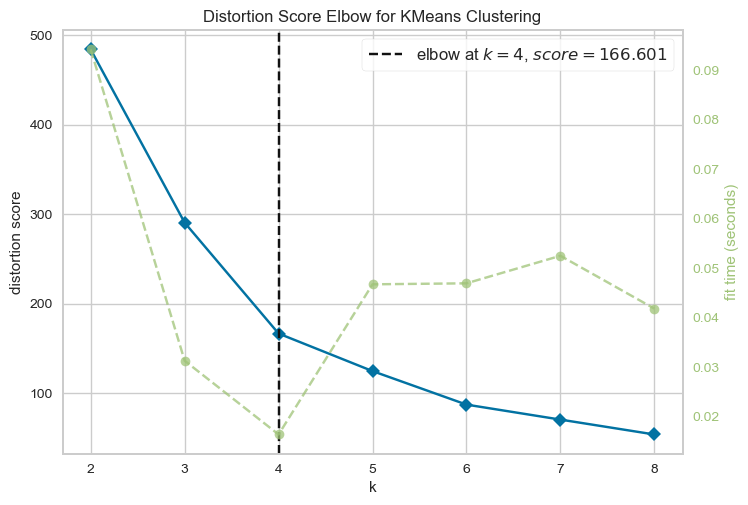

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
#Elbow Method for determining amount of clusters (NOT TOTAL)
model = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,9), distance_metric='euclidean')
visualizer.fit(t_tristate_decomp)
visualizer.show()

In [11]:
#Creates cluster Dataframes
cluster_df = pd.DataFrame(zip(tristate_indexes, tristate_labels), columns=["county", "cluster"])
total_cluster_df = pd.DataFrame(zip(total_indexes, total_labels), columns=["county", "cluster"])
cluster_df["cluster"].value_counts()

0    2467
1    1405
3     414
2      55
Name: cluster, dtype: int64

In [12]:
mstate = []
fstate = []
nstate = []
for x in range(len(MD_condensed)):
    mstate.append('MD')
for x in range(len(FL_condensed)):
    fstate.append('FL')
for x in range(len(NY_condensed)):
    nstate.append('NY')

In [13]:
#Recreates tristate dataframe
NY_condensed['State'] = nstate
FL_condensed['State'] = fstate
MD_condensed['State'] = mstate
allstates = [NY_condensed,FL_condensed, MD_condensed]
tristate = pd.concat(allstates)
tristate_totals = tristate.groupby('County')[['County', 'Year', 'Population', 'Index Count', 'Index Rate', 'Violent Count', 'Violent Rate', 'Property Count', 'Property Rate']].sum()
tristate["County-Year"] = tristate['County'].astype(str) +"-"+ tristate["Year"].astype(str)
tristate.drop(['County', 'Year'], axis=1, inplace=True)
tristate.dropna(inplace = True)
tristate.set_index('County-Year', inplace=True)
tristate_indexes = tristate.index

In [14]:
#Recreates tristate dataframe (Dependent on above block)
tristate_totals.drop(['Year'], axis=1, inplace=True)
tristate_totals['Population'] = tristate_totals['Population']/30
tristate_totals['Index Rate'] = tristate_totals['Index Rate']/30
tristate_totals['Index Count'] = tristate_totals['Index Count']/30
tristate_totals['Violent Rate'] = tristate_totals['Violent Rate']/30
tristate_totals['Violent Count'] = tristate_totals['Violent Count']/30
tristate_totals['Property Rate'] = tristate_totals['Property Rate']/30
tristate_totals['Property Count'] = tristate_totals['Property Count']/30
total_indexes = tristate_totals.index

In [15]:
tristate['Cluster'] = tristate_labels
for index, row in tristate.iterrows():
    tristate.at[index, 'Violent %'] = (row[3] / row[1]) * 100
    tristate.at[index, 'Property %'] = (row[5] / row[1]) *100
tristate

,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,State,Cluster,Violent %,Property %
County-Year,,,,,,,,,,,
Albany-1990.0,292594.0,14418.0,4927.600000,1524.0,520.900000,12894.0,4406.800000,NY,1,10.570121,89.429879
Albany-1991.0,294030.0,15464.0,5259.300000,1674.0,569.300000,13790.0,4690.000000,NY,1,10.825142,89.174858
Albany-1992.0,295018.0,16249.0,5507.800000,1588.0,538.300000,14661.0,4969.500000,NY,1,9.772909,90.227091
Albany-1993.0,294302.0,15139.0,5144.000000,1669.0,567.100000,13470.0,4576.900000,NY,1,11.024506,88.975494
Albany-1994.0,293843.0,16724.0,5691.500000,1771.0,602.700000,14953.0,5088.800000,NY,1,10.589572,89.410428
...,...,...,...,...,...,...,...,...,...,...,...
Worcester County-2016.0,51255.0,1987.0,25.795169,152.0,337.203947,1835.0,27.931880,MD,0,7.649723,92.350277
Worcester County-2017.0,51408.0,1950.0,26.363077,177.0,290.440678,1773.0,28.994924,MD,0,9.076923,90.923077
Worcester County-2018.0,51304.0,1551.0,33.078014,124.0,413.741935,1427.0,35.952348,MD,0,7.994842,92.005158


In [16]:
tristate_totals['Cluster'] = total_labels
for index, row in tristate_totals.iterrows():
    tristate_totals.at[index, 'Violent %'] = 100 * (row[3] / row[1])
    tristate_totals.at[index, 'Property %'] = 100 * (row[5] / row[1])
tristate_totals

,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Cluster,Violent %,Property %
County,,,,,,,,,,
Alachua County,239396.766667,14032.300000,19.753633,1664.333333,156.275610,12367.966667,22.720586,0,11.860731,88.139269
Albany,309240.266667,12415.400000,4165.266667,1394.866667,467.473333,11020.533333,3697.810000,2,11.234972,88.765028
Allegany,51250.000000,901.766667,1803.353333,104.200000,208.770000,797.566667,1594.576667,2,11.555096,88.444904
Allegany County,76234.533333,2524.333333,31.653862,292.700000,276.805347,2231.633333,35.919290,0,11.595141,88.404859
Anne Arundel County,525964.766667,19669.233333,29.253967,2638.400000,216.546515,17030.833333,34.101552,0,13.413843,86.586157
...,...,...,...,...,...,...,...,...,...,...
Westchester,964251.633333,21240.100000,2312.823333,2786.200000,301.496667,18453.900000,2011.343333,2,13.117641,86.882359
Wicomico County,93024.433333,4497.733333,22.576681,711.666667,146.634133,3786.066667,26.866950,0,15.822785,84.177215
Worcester County,47990.633333,2587.400000,20.241812,285.266667,199.156223,2302.133333,22.735463,0,11.025225,88.974775


In [17]:
tristate.to_csv('tristate_clustered.csv')
tristate_totals.to_csv('tristate_total_clustered.csv')

In [18]:
cluster0 = tristate.loc[tristate['Cluster'] == 0]
cluster1 = tristate.loc[tristate['Cluster'] == 1]
cluster2 = tristate.loc[tristate['Cluster'] == 2]
cluster3 = tristate.loc[tristate['Cluster'] == 3]
tcluster0 = tristate_totals.loc[tristate_totals['Cluster'] == 0]
tcluster1 = tristate_totals.loc[tristate_totals['Cluster'] == 1]
tcluster2 = tristate_totals.loc[tristate_totals['Cluster'] == 2]
tcluster3 = tristate_totals.loc[tristate_totals['Cluster'] == 3]

In [19]:
#cluster0.describe().to_csv('cluster0.csv')
cluster0.describe()

,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Cluster,Violent %,Property %
count,2.467000e+03,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.0,2467.000000,2467.000000
mean,1.707403e+05,5584.768139,193.190062,639.542764,264.676653,4945.225375,180.534898,0.0,12.770089,87.229911
std,2.083754e+05,6804.665858,403.727871,778.648277,152.405849,6090.786321,358.706901,0.0,4.900163,4.900163
min,4.342000e+03,29.000000,7.714449,1.000000,20.600000,26.000000,8.525683,0.0,1.612903,56.493506
25%,3.666850e+04,974.500000,24.092839,124.000000,157.829144,838.000000,27.555659,0.0,9.545826,85.098265
50%,9.564400e+04,2772.000000,33.920949,327.000000,226.318681,2451.000000,39.020287,0.0,12.104143,87.895857
75%,2.238585e+05,7518.500000,52.240396,831.000000,340.131483,6650.000000,62.138313,0.0,14.901735,90.454174
max,1.471317e+06,40668.000000,1564.900000,9480.000000,1195.571429,37701.000000,1461.500000,0.0,43.506494,98.387097


In [20]:
#cluster1.describe().to_csv('cluster1.csv')
cluster1.describe()

,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Cluster,Violent %,Property %
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.0,1405.000000,1405.000000
mean,161064.185765,4692.146619,2551.971556,504.382918,250.774429,4187.763701,2306.171108,1.0,9.745309,90.254691
std,195826.271984,6976.074786,825.154332,827.327550,145.724826,6193.879210,758.865701,0.0,3.845327,3.845327
min,4819.000000,60.000000,74.244755,1.000000,19.100000,51.000000,77.496350,1.0,0.990099,66.524520
25%,52698.000000,1182.000000,1945.200000,103.000000,160.600000,1058.000000,1749.200000,1.0,6.832695,88.014101
50%,85642.000000,2020.000000,2379.900000,177.000000,223.600000,1854.000000,2155.600000,1.0,9.428830,90.571170
75%,179764.000000,5165.000000,2949.600000,521.000000,310.900000,4599.000000,2674.600000,1.0,11.985899,93.167305
max,968442.000000,46220.000000,6185.100000,5546.000000,2514.500000,41489.000000,5769.900000,1.0,33.475480,99.009901


In [21]:
#cluster2.describe().to_csv('cluster2.csv')
cluster2.describe()

,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Cluster,Violent %,Property %
count,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,55.000000
mean,1.849636e+06,144547.527273,5459.351055,28260.254545,1380.733015,116287.272727,4105.143193,2.0,21.995334,78.004666
std,4.828040e+05,62344.725424,4300.380776,11915.196116,935.938816,60457.121007,3476.070862,0.0,9.307756,9.307756
min,3.116900e+04,6021.000000,7.359878,748.000000,80.569990,5273.000000,8.099774,2.0,8.842293,66.001458
25%,1.490716e+06,92239.000000,1458.716473,20597.000000,514.346503,65995.000000,1016.964496,2.0,11.315380,67.775855
50%,1.961694e+06,148398.000000,5411.500000,25095.000000,1422.500000,103638.000000,4060.000000,2.0,20.287565,79.712435
75%,2.298484e+06,189603.000000,7681.300000,32296.000000,2228.800000,154740.500000,5691.650000,2.0,32.224145,88.684620
max,2.538594e+06,258874.000000,19317.300000,63087.000000,2989.200000,235072.000000,16917.500000,2.0,33.998542,91.157707


In [22]:
#cluster3.describe().to_csv('cluster3.csv')
cluster3.describe()

,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Cluster,Violent %,Property %
count,4.140000e+02,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.0,414.000000,414.000000
mean,1.300074e+06,56663.632850,904.513756,7934.596618,295.905166,48729.036232,731.321088,3.0,14.810556,85.189444
std,5.605085e+05,23854.500916,1392.599048,4242.221404,252.155686,22513.549206,1142.993055,0.0,7.906375,7.906375
min,5.972390e+05,20705.000000,7.400112,1749.000000,33.006256,17060.000000,9.538726,3.0,5.675311,62.488462
25%,8.620128e+05,39368.750000,15.381811,4901.000000,126.689830,32580.000000,17.556095,3.0,9.019102,81.468065
50%,1.240610e+06,52186.000000,22.848856,7141.000000,201.774794,44033.500000,25.077543,3.0,11.301592,88.698408
75%,1.503167e+06,66760.750000,1954.050000,9952.250000,372.263689,58923.500000,1543.025000,3.0,18.531935,90.980898
max,2.832794e+06,159825.000000,5772.200000,22006.000000,1524.100000,143804.000000,4899.200000,3.0,37.511538,94.324689


In [23]:
#tcluster0.describe().to_csv('tcluster0.csv')
tcluster0.describe()

,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Cluster,Violent %,Property %
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.000000,81.000000
mean,132849.464609,4894.606584,76.109776,551.695062,250.765300,4342.911523,76.968121,0.0,13.312313,86.687687
std,145670.075334,6183.181742,231.303947,662.860655,122.857447,5539.723156,209.485891,0.0,3.874961,3.874961
min,812.700000,10.866667,7.763859,2.700000,33.314019,8.166667,10.262236,0.0,6.574363,75.153374
25%,26121.166667,711.066667,22.808245,83.033333,158.498502,636.200000,27.421756,0.0,10.659898,84.837978
50%,76234.533333,2524.333333,30.865866,317.766667,223.732912,2231.633333,34.769069,0.0,12.647127,87.352873
75%,187081.300000,5421.766667,38.244137,695.000000,330.831736,4726.766667,44.484484,0.0,15.162022,89.340102
max,561796.900000,26924.000000,1318.653333,2680.566667,617.564069,24642.133333,1197.370000,0.0,24.846626,93.425637


In [24]:
#tcluster1.describe().to_csv('tcluster1.csv')
tcluster1.describe()

,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Cluster,Violent %,Property %
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000
mean,2.047382e+06,94559.586667,3350.287702,18821.666667,902.878471,75737.920000,2482.346997,1.0,23.126768,76.873232
std,5.178630e+05,47272.867375,2057.557331,5085.496899,468.230431,47905.399114,1608.597021,0.0,9.704220,9.704220
min,1.375903e+06,52279.733333,16.585175,15194.500000,172.885689,34649.900000,18.371651,1.0,9.499608,66.277882
25%,1.629780e+06,69444.166667,3348.920000,16603.500000,727.170000,54249.666667,2549.210000,1.0,19.434158,68.902210
50%,2.235691e+06,86960.633333,3702.606667,16900.066667,1096.663333,61552.066667,2621.756667,1.0,21.880168,78.119832
75%,2.441666e+06,89332.500000,4051.706667,17629.833333,1153.406667,70060.566667,2687.443333,1.0,31.097790,80.565842
max,2.553872e+06,174780.900000,5631.620000,27780.433333,1364.266667,158177.400000,4534.953333,1.0,33.722118,90.500392


In [25]:
#tcluster2.describe().to_csv('tcluster2.csv')
tcluster2.describe()

,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Cluster,Violent %,Property %
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.000000,53.000000
mean,166136.838994,4596.644654,2456.439057,512.137736,241.474025,4084.506918,2214.964465,2.0,9.795420,90.204580
std,211074.068667,7116.659672,664.237230,913.401160,100.769274,6232.499284,598.563057,0.0,3.011467,3.011467
min,5205.766667,86.033333,1589.806667,4.333333,85.600000,81.700000,1404.356667,2.0,4.766512,80.276769
25%,51928.866667,1017.066667,1983.603333,104.200000,180.116667,930.866667,1834.050000,2.0,7.555182,88.444904
50%,83845.833333,2046.600000,2282.806667,167.633333,222.526667,1850.366667,2026.686667,2.0,9.576356,90.423644
75%,181959.933333,4818.800000,2936.746667,492.100000,279.053333,4325.600000,2596.636667,2.0,11.555096,92.444818
max,969984.766667,37191.300000,4165.266667,5290.533333,560.520000,31900.766667,3757.673333,2.0,19.723231,95.233488


In [26]:
#tcluster3.describe().to_csv('tcluster3.csv')
tcluster3.describe()

,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Cluster,Violent %,Property %
count,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000
mean,1.092731e+06,51090.138889,398.958090,5965.219444,208.348000,45124.919444,369.227006,3.0,11.694028,88.305972
std,3.063861e+05,17933.116403,894.072295,3121.824132,100.167573,16476.620009,818.915083,0.0,4.722895,4.722895
min,6.797817e+05,25101.833333,13.195663,2137.400000,53.740128,22490.966667,17.593776,3.0,7.237560,76.087215
25%,8.591047e+05,37185.075000,20.422310,4669.316667,157.611590,33654.258333,22.663736,3.0,8.629985,88.011127
50%,1.003848e+06,51588.600000,22.064335,5909.433333,194.155000,44313.150000,25.036274,3.0,10.639947,89.360053
75%,1.271382e+06,61611.266667,29.905948,6802.600000,231.162159,54774.425000,33.489836,3.0,11.988873,91.370015
max,1.697586e+06,86393.566667,2666.266667,14164.666667,470.980763,79849.300000,2474.523333,3.0,23.912785,92.762440
